In [116]:
%config IPCompleter.greedy=True

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [118]:
dataset = pd.read_csv("../data/Position_Salaries.csv")
print(dataset)

             Position  Level   Salary
0    Business Analyst    1.0    45000
1   Junior Consultant    2.0    50000
2   Junior Consultant    2.5    10000
3   Senior Consultant    3.0    60000
4             Manager    4.0    80000
5     Country Manager    5.0   110000
6      Region Manager    6.0   150000
7             Partner    7.0   200000
8      Senior Partner    8.0   300000
9             C-level    9.0   500000
10                CEO   10.0  1000000


In [119]:
X = dataset.iloc[:, 1].values
y = dataset.iloc[:, 2].values
print(X)

[ 1.   2.   2.5  3.   4.   5.   6.   7.   8.   9.  10. ]


In [120]:
X = X.reshape(-1, 1)
print(X)

[[ 1. ]
 [ 2. ]
 [ 2.5]
 [ 3. ]
 [ 4. ]
 [ 5. ]
 [ 6. ]
 [ 7. ]
 [ 8. ]
 [ 9. ]
 [10. ]]


In [121]:
from sklearn.preprocessing import StandardScaler
norm_x = StandardScaler()
X = norm_x.fit_transform(X)
print(X)

[[-1.47230064]
 [-1.12401447]
 [-0.94987138]
 [-0.77572829]
 [-0.42744212]
 [-0.07915595]
 [ 0.26913022]
 [ 0.6174164 ]
 [ 0.96570257]
 [ 1.31398874]
 [ 1.66227492]]


In [122]:
from sklearn.preprocessing import StandardScaler
norm_y = StandardScaler()
y = y.reshape(-1, 1) 
y = norm_y.fit_transform(y)
print(y)

[[-0.6539759 ]
 [-0.63608103]
 [-0.77923994]
 [-0.60029131]
 [-0.52871186]
 [-0.42134268]
 [-0.27818378]
 [-0.09923515]
 [ 0.25866211]
 [ 0.97445662]
 [ 2.76394291]]


In [123]:
from sklearn.svm import SVR

In [124]:
regressor = SVR(kernel="rbf")
regressor.fit(X, y.ravel())

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [125]:
y_pred = regressor.predict(norm_x.transform([[10.5]]))
print(y_pred)

[1.19152942]


In [126]:
y_pred = norm_y.inverse_transform(y_pred.reshape(-1, 1) )

In [127]:
print(y_pred)

[[560652.26543156]]


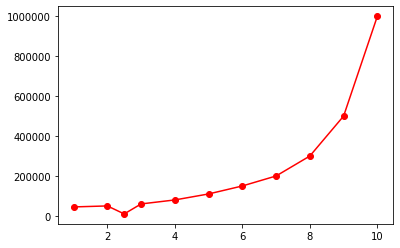

In [128]:
y_prediction = norm_y.inverse_transform(regressor.predict(X))


plt.scatter(norm_x.inverse_transform(X), norm_y.inverse_transform(y), color= "red")
plt.plot(norm_x.inverse_transform(X), norm_y.inverse_transform(y), color= "red")
plt.show()